In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

import plotly_express as px
import plotly.io as pio

#pio configuration
pio.renderers.default = "notebook_connected"

## Get the data.

In [2]:
fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0, nrows=260)
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0, nrows=260)
pop = pd.read_excel('gapminder_population.xlsx', index_col=0, nrows=260)
cont= pd.read_csv('continents.csv', sep=';', index_col=0)

In [3]:
fert.shape, life.shape, pop.shape, cont.shape

((260, 216), (260, 217), (260, 91), (194, 1))

## Data wrangling.

Reset index, merge dataframes, rearrange axes.

In [4]:
fert.columns = fert.columns.astype(int)
fert.index
fert.index.name = 'country'
fert = fert.reset_index()
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
fert

country  year  fertility_rate
0                   Abkhazia  1800             NaN
1                Afghanistan  1800            7.00
2      Akrotiri and Dhekelia  1800             NaN
3                    Albania  1800            4.60
4                    Algeria  1800            6.99
...                      ...   ...             ...
56155             Yugoslavia  2015             NaN
56156                 Zambia  2015            5.59
56157               Zimbabwe  2015            3.35
56158                  Åland  2015             NaN
56159                  Åland  2015             NaN

[56160 rows x 3 columns]

In [5]:
life.index.name='country'
life=life.reset_index()
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
life

country  year  life_expectancy
0                   Abkhazia  1800              NaN
1                Afghanistan  1800            28.21
2      Akrotiri and Dhekelia  1800              NaN
3                    Albania  1800            35.40
4                    Algeria  1800            28.82
...                      ...   ...              ...
56415             Yugoslavia  2016              NaN
56416                 Zambia  2016            57.10
56417               Zimbabwe  2016            61.69
56418                  Åland  2016              NaN
56419            South Sudan  2016            56.10

[56420 rows x 3 columns]

In [6]:
pop.index.name='country'
pop=pop.reset_index()
pop = pop.melt(id_vars='country', var_name='year', value_name='population')
pop

country         year  population
0                   Abkhazia         1800         NaN
1                Afghanistan         1800   3280000.0
2      Akrotiri and Dhekelia         1800         NaN
3                    Albania         1800    410445.0
4                    Algeria         1800   2503218.0
...                      ...          ...         ...
23655             Yugoslavia  Unnamed: 91         NaN
23656                 Zambia  Unnamed: 91         NaN
23657               Zimbabwe  Unnamed: 91         NaN
23658                  Åland  Unnamed: 91         NaN
23659            South Sudan  Unnamed: 91         NaN

[23660 rows x 3 columns]

In [7]:
df = fert.merge(pop)
df_merged = df.merge(life)
df_merged.dropna()

country  year  fertility_rate  population  \
1                Afghanistan  1800            7.00   3280000.0   
3                    Albania  1800            4.60    410445.0   
4                    Algeria  1800            6.99   2503218.0   
7                     Angola  1800            6.93   1567028.0   
9        Antigua and Barbuda  1800            5.00     37000.0   
...                      ...   ...             ...         ...   
20969                Vietnam  2015            1.70  93447601.0   
20970  Virgin Islands (U.S.)  2015            2.45    106291.0   
20973                  Yemen  2015            3.83  26832215.0   
20975                 Zambia  2015            5.59  16211767.0   
20976               Zimbabwe  2015            3.35  15602751.0   

       life_expectancy  
1                28.21  
3                35.40  
4                28.82  
7                26.98  
9                33.54  
...                ...  
20969            75.40  
20970            80.60  
20973            66.00  
20975            56.70  
20976            59.30  

[16230 rows x 5 columns]

## Inspect variables.
Descriptive statistics, exploratory plots.

In [8]:
df_merged.describe

<bound method NDFrame.describe of                      country  year  fertility_rate  population  \
0                   Abkhazia  1800             NaN         NaN   
1                Afghanistan  1800            7.00   3280000.0   
2      Akrotiri and Dhekelia  1800             NaN         NaN   
3                    Albania  1800            4.60    410445.0   
4                    Algeria  1800            6.99   2503218.0   
...                      ...   ...             ...         ...   
20974             Yugoslavia  2015             NaN         NaN   
20975                 Zambia  2015            5.59  16211767.0   
20976               Zimbabwe  2015            3.35  15602751.0   
20977                  Åland  2015             NaN         NaN   
20978                  Åland  2015             NaN         NaN   

       life_expectancy  
0                  NaN  
1                28.21  
2                  NaN  
3                35.40  
4                28.82  
...                ... 

#### Plot the life expectancy from 1800 to 2000 for 3 countries.

<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

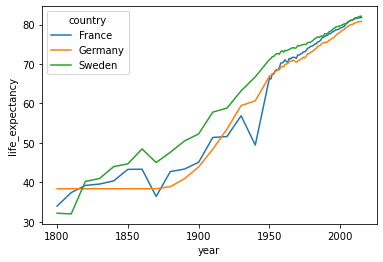

In [9]:
df_subset = df_merged.loc[df['country'].isin(['Germany', 'France', 'Sweden'])]
sns.lineplot(x='year', y='life_expectancy', hue='country',
            data=df_subset)

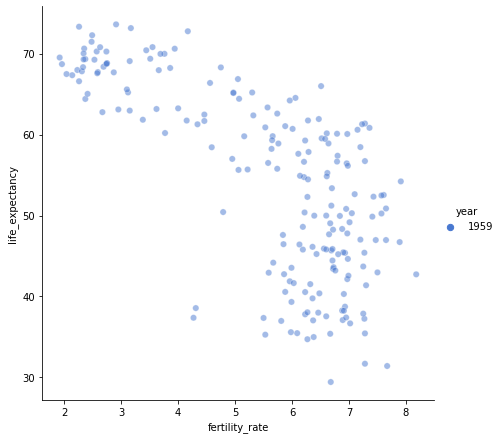

In [10]:
#make a scatterplot showing the correlation between life expectancy and fertility for a specific year
year = df_merged[df_merged['year'] == 1959]
sns.relplot(x='fertility_rate', y='life_expectancy', hue='year', data=year, size="year",
           sizes=(40, 400), alpha=.5, palette="muted",
           height=6)

#### Select a year interval from 1960 to 2015 and remove duplicates.

In [11]:
years_interval = df_merged.loc[df_merged['year'].between(1960, 2015)].dropna()
years_interval

country  year  fertility_rate  population  \
6476             Afghanistan  1960            7.67   8994793.0   
6478                 Albania  1960            6.19   1636054.0   
6479                 Algeria  1960            7.65  11124892.0   
6482                  Angola  1960            7.32   5270844.0   
6484     Antigua and Barbuda  1960            4.43     54681.0   
...                      ...   ...             ...         ...   
20969                Vietnam  2015            1.70  93447601.0   
20970  Virgin Islands (U.S.)  2015            2.45    106291.0   
20973                  Yemen  2015            3.83  26832215.0   
20975                 Zambia  2015            5.59  16211767.0   
20976               Zimbabwe  2015            3.35  15602751.0   

       life_expectancy  
6476             31.94  
6478             62.87  
6479             47.50  
6482             35.98  
6484             62.97  
...                ...  
20969            75.40  
20970            80.60  
20973            66.00  
20975            56.70  
20976            59.30  

[11250 rows x 5 columns]

#### Iterate over the years between 1960 to 2015 and make a plot for each one of them.

In [12]:
years = years_interval.year.unique() 

for i in years:
    year = df_merged[df_merged['year'] == i] 
    year.plot.scatter('fertility_rate','life_expectancy', s = year['population']*0.00005, c='teal', figsize=(18, 10), alpha=0.5)
    plt.axis((0, 10, 0, 100))
    t = plt.text(2.5, 50, i, c='blue', fontsize=150, alpha=0.2)
    plt.title('Correlation between life expectancy and fertility from 1960 to 2015', fontsize=18)
    plt.ylabel('Life Expectancy', fontsize=16)
    plt.xlabel('Fertility %', fontsize=16)
    plt.savefig('plots/lifeexp_'+str(i)+'.png', c='grey')
    plt.close()
    

<ipython-input-12-f130f5302c5d>:11: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "c" which is no longer supported as of 3.3 and will become an error two minor releases later



In [13]:
import imageio

images = []

for x in years:
    filename = 'plots/lifeexp_{}.png'.format(x)
    images.append(imageio.imread(filename))
imageio.mimsave('output.gif', images, fps=5)

In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

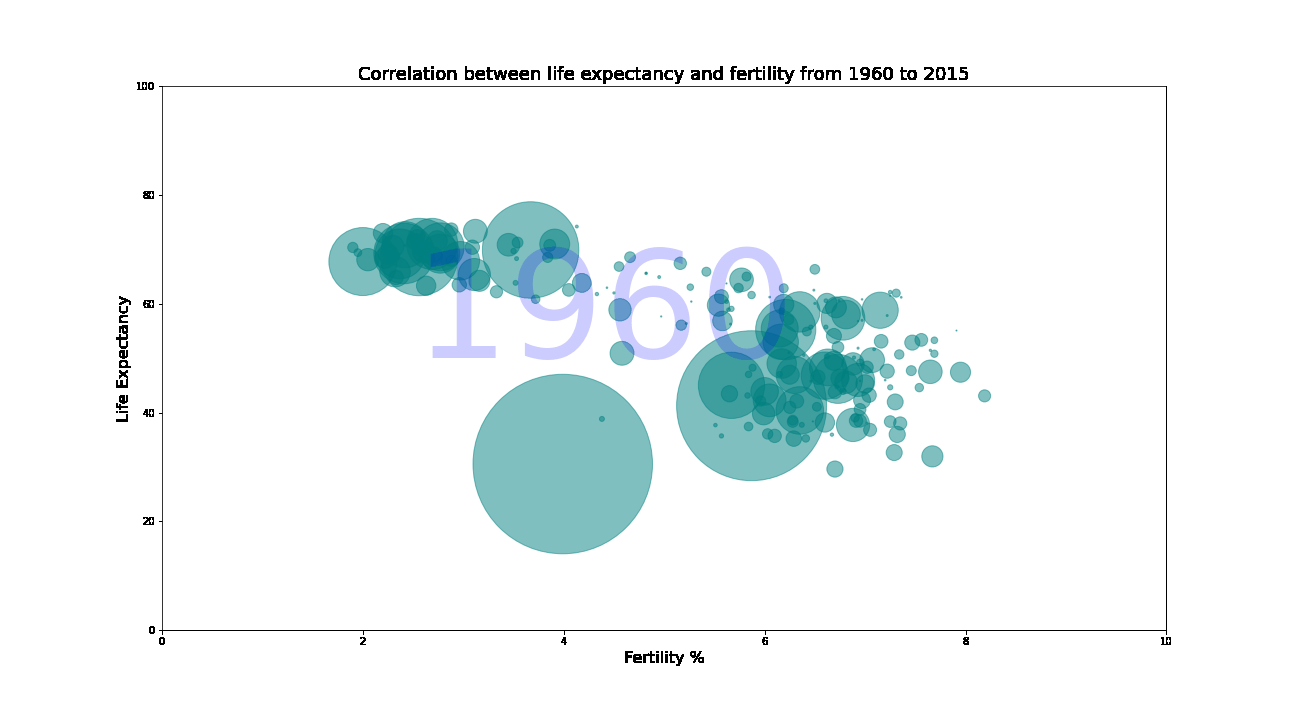

In [15]:
from pathlib import Path
gifPath = Path("/Users/test1/Desktop/convolutionalcurry-student-code_2/project_1_visual_data_analysis/output.gif")
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')